In [ ]:
# prompt: connect with my drive and read data from Infosys ML Course folder

from google.colab import drive
drive.mount('/content/drive')

# Assuming data is in a CSV file named 'data.csv'
import pandas as pd
computers = pd.read_csv('/content/drive/My Drive/Infosys ML Course/computers.csv')
computers.head()


Mounted at /content/drive


,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


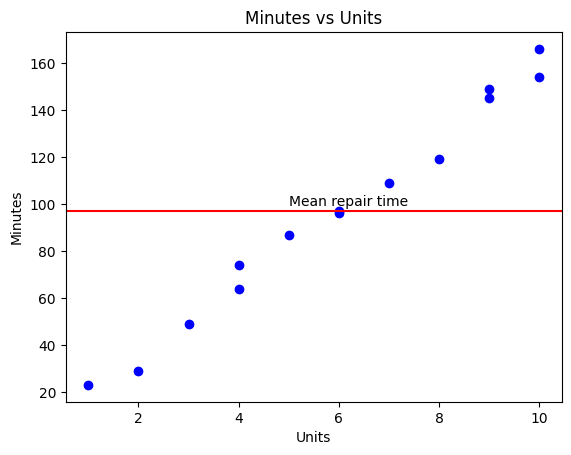

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mean_value = np.mean(computers['Minutes'])
# plotting the mean

plt.axhline(y=mean_value, color='r', linestyle='-')

# adding annotation
plt.annotate("Mean repair time", xy=(5, mean_value+2))

plt.scatter(computers['Units'],computers['Minutes'],color = 'blue', marker = 'o')
plt.title('Minutes vs Units')
plt.xlabel('Units')
plt.ylabel('Minutes')
plt.show()

In [ ]:
# lets try different models and compare their performance

min_model0 = computers['Minutes'].mean()  # it takes constant time for every unit
min_model1 = 10 + 12 * computers['Units']  # base time is 10 and time taken is calculated by 12 * number of units
min_model2 = 6 + 18 * computers['Units']

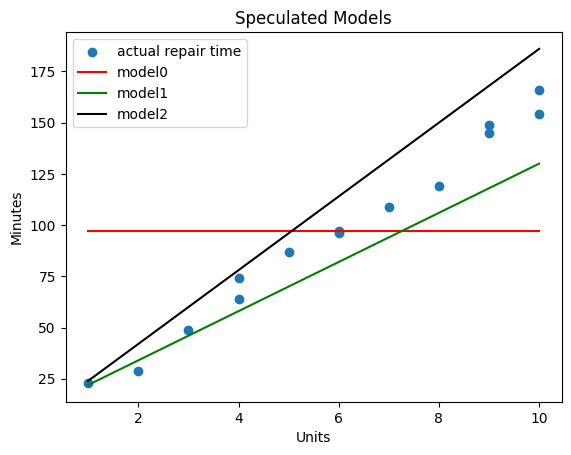

In [ ]:
computers['min_model0'] = computers['Minutes'].mean()
computers['min_model1'] = 10 + 12 * computers['Units']
computers['min_model2'] = 6 + 18 * computers['Units']

fig,ax = plt.subplots()
# Plotting the actual 'Minutes'
ax.scatter(x="Units",y="Minutes",data=computers,label='actual repair time')
# Plotting the Model0 predictions
ax.plot(computers['Units'],computers['min_model0'],color="red",label='model0')
# Plotting the Model1 predictions
ax.plot(computers['Units'],computers['min_model1'],color="green",label='model1')
# Plotting the Model2 predictions
ax.plot(computers['Units'],computers['min_model2'],color="black",label='model2')
# Adding xlabel, ylabel, title and legend
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()


  # Analyzing model0

In [ ]:
# Validating Model0: Estimated time = mean('Minutes')
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model0, error in prediction by Model0.
model0_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_model0'],
              "Error":(computers['min_model0'] - computers['Minutes'])})
model0_obs # Printing the DataFrame


,Units,Actual time,Predicted time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [ ]:
# Sum of errors of model0
print(sum(model0_obs['Error']))


1.4210854715202004e-14


In the previous observations from the graph and table, Model 0 (which used arithmetic mean) did not provide proper predictions, the total error came as 1.4e14, which is almost zero. This is because the positive and negative errors get cancelled with one another

In [ ]:
# Sum of squared errors
sum(model0_obs['Error']**2)


27768.357142857145

# Analyzing Model1

In [ ]:
model1_obs = pd.DataFrame({"Units":computers['Units'],
              "Actual time":computers['Minutes'],
              "Predicted time":computers['min_model1'],
              "Error":(computers['min_model1'] - computers['Minutes'])})
model1_obs

,Units,Actual time,Predicted time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [ ]:
# SSE for Model1
sum(model1_obs.Error**2)


4993

# Analyzing Modle2

In [ ]:
# Creating a Pandas DataFrame with 'Units', actual 'Minutes', predicted 'Minutes' by Model2, error in prediction by Model2.
# Model2: Estimated time = 6 + 18*(#Units) minutes
model2_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_model2,
              "Error":(computers.min_model2 - computers.Minutes)})
model2_obs


,Units,Actual time,Predicted time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [ ]:
# SSE for Model2
sum(model2_obs.Error**2)


5001

The best fit model is determined by the intercept and coefficient value such that the error is minimum:


**y = a + bx + E**

 here is how to calculate

In [ ]:
x = computers.Units
y = computers.Minutes
xiyi = x*y
n = len(computers)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)


intercept :  4.161654135338296  coefficient :  15.508771929824569


Therefore our best fit model has the following equation:

***Y = 4.16165  + 15.50877 * computers.Units***

In [ ]:
# Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*computers.Units
# Adding the predicted values to the dataset
computers['min_best_fit_model'] = min_best_fit_model
# Printing the values predicted by the best fit model
computers[["Units","Minutes","min_best_fit_model"]]


,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best fit model line')

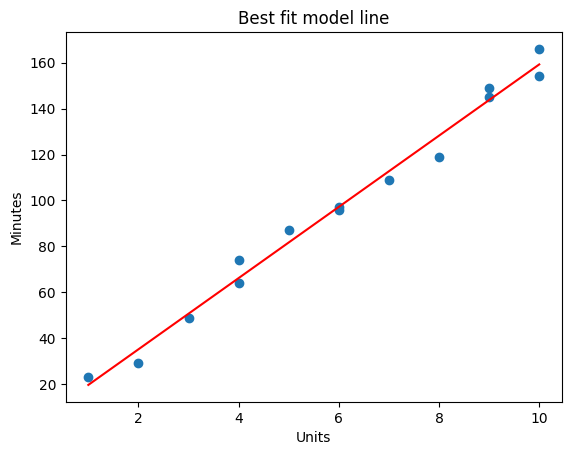

In [ ]:
fig,ax = plt.subplots()
# Plotting the actual target values
ax.scatter(x="Units",y="Minutes",data=computers)
# Plotting the target values predicted by the best fit model
ax.plot(computers.Units,computers.min_best_fit_model,color="red")
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Best fit model line")


In [ ]:
min_best_fit_model_obs = pd.DataFrame({"Units":computers.Units,
              "Actual time":computers.Minutes,
              "Predicted time":computers.min_best_fit_model,
              "Error":(computers.min_best_fit_model- computers.Minutes)})
min_best_fit_model_obs

,Units,Actual time,Predicted time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [ ]:
sum(min_best_fit_model_obs.Error**2)


348.848370927318

# Best Fit Model using sklearn linear_model.LinearRegression

The best fit linear regression model can also be easily built in Python using the sklearn.linear_model.LinearRegression class as shown below:

In [ ]:
# Setting the 'Units' column as the input data or predictor column
X = computers[['Units']]
# Setting the 'Minutes' column as the output data or target column
y=computers['Minutes']
# Importing the required class
from sklearn.linear_model import LinearRegression
# Creating a linear regression model
model = LinearRegression()
# Fitting the model to the data i.e. building the model
model.fit(X, y)
# Fetching intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficients:",model.coef_)


Intercept: 4.161654135338296
Coefficients: [15.50877193]


# Coefficient of Determination:
So far you learnt to create best fit Linear Regression Model. Now, let us try to determine if the model is useful using the same dataset.

Time taken to repair a computer ≈ 4.161654 + (15.50877 x Units being replaced)

The usefulness of a linear regression model for a data set with an outcome variable y and a predictor variable x, having a linear relationship modeled using simple linear regression



can be determined using the coefficient of determination


```
# Rsq = sum of squared regression(SSR) / sum of squared total (SST)

```




In [ ]:
SST = sum((computers.Minutes.mean() - computers.Minutes)**2)
SST
# 27768.357142857145
SSE = sum(min_best_fit_model_obs.Error**2)
SSE
# 348.848370927318
SSR = SST - SSE
SSR
# 27419.508771929828
Rsq = SSR/SST
Rsq
# 0.9874371980620736

0.9874371980620736

In [ ]:
# the built in score method can calculate the rsq for us

Rsq1 = model.score(computers[["Units"]],y)
Rsq1
# 0.9874371980620736

0.9874371980620736